In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, stats

In [2]:
def model(x, a, b, c):
    return a*x**2 + b*x + c

In [3]:
p = (1, 1, 1)

In [4]:
x = np.linspace(-1, 1, 50)
y = model(x, *p) + 0.025 * np.random.normal(size=x.size)

In [5]:
y[20] *= 1.15

In [6]:
xlin = np.linspace(x.min(), x.max(), 200)

In [7]:
popt, pcov = optimize.curve_fit(model, x, y)
yhat = model(xlin, *popt)

In [8]:
popt

array([0.97484542, 0.99451161, 1.00811718])

In [9]:
def residuals(p, x, y):
    return model(x, *p) - y

In [10]:
result = optimize.least_squares(residuals, x0=(2,2,2), args=(x, y), loss="cauchy")
yrhat = model(xlin, *result.x)

In [11]:
result.x

array([0.97500016, 0.99453781, 1.00801474])

In [12]:
zhat = stats.zscore(model(x, *popt) - y)
zrhat = stats.zscore(model(x, *result.x) - y)

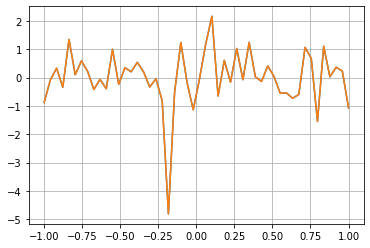

In [13]:
fig, axe = plt.subplots()
axe.plot(x, zhat)
axe.plot(x, zrhat)
axe.grid()

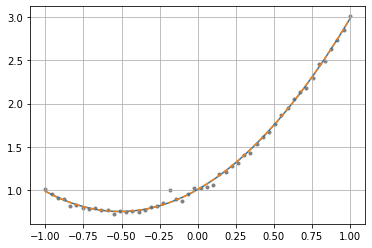

In [14]:
fig, axe = plt.subplots()
axe.scatter(x, y, marker=".", color="gray")
axe.plot(xlin, yhat)
axe.plot(xlin, yrhat, "--")
axe.grid()